<a href="https://colab.research.google.com/github/kyata/introduction_to_ml_with_python/blob/master/chapter2_3_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3.8 ニューラルネットワーク

## 多層パーセプロトロンの定義

- 多層パーセプトロン(multilayer percepton : MLP)
- 計算モデル

$$
\hat y = w[0] \times x[0] + x[1] \times w[1] + \cdots + w[p] \times x[p] +b
$$

$ \hat y $ : 入力特徴量x[0]からx[p]までの重み付き和 

$ w[0..p] $ :  学習された係数

In [0]:
# いつもの
!pip install mglearn

import mglearn
import numpy as np
import matplotlib.pyplot as plt

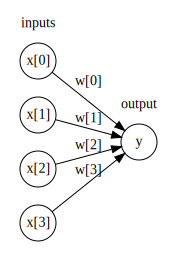

In [0]:
display(mglearn.plots.plot_logistic_regression_graph())

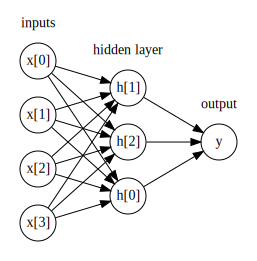

In [0]:
display(mglearn.plots.plot_single_hidden_layer_graph())

計算順序
1. 中間処理ステップを表す**隠れユニット**の計算で重み付き和が行われる
1. 隠れユニットの値に対して重み付き和が行われる
1. 1と2の値を加算して結果が算出される

- このモデルは学習しなければならない係数がいっぱい
    - すべての入力ノードとすべての隠れユニットの間に１つずつ
    - すべての隠れ層のユニットと出力ノード間に１つずつ
    
- 一連の重み付き和を計算することは  
  ***数学的には１つの重み付き和を計算することと同じ***
  
- 線形モデルよりも強力にするために...
    - 個々の隠れユニットの重み付き和を計算し、その結果に対して**非線形関数を適用**

## 非線形関数

- relu(rectified linear unit: 正規化線形関数)
    - ゼロ以下の値を切り捨てる

- tanh(hyperbolic tangent: 双曲正接関数)
    - 小さい値は-1にする
    - 大きい値は+1にする

- いずれの非線形関数もニューラルネットワークが線形モデルよりも
複雑な関数を学習することを可能になる


Text(0, 0.5, 'relu(x), tanh(x)')

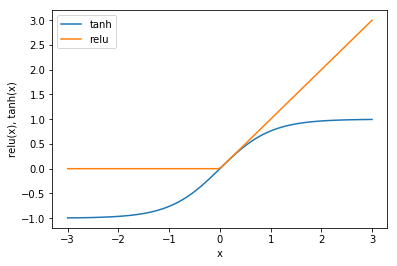

In [0]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")

plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

- 小さなニューラルネットワークで回帰を行う場合の $\ \hat y$ を計算する式
$$
h[0] = tanh(w[0, 0], \times x[0] + w[1, 0] \times w[2, 0], \times x[2] + w[3, 0] \times x[3] + b[0] ) \\
h[1] = tanh(w[0, 1], \times x[0] + w[1, 1] \times w[2, 1], \times x[2] + w[3, 1] \times x[3] + b[0] ) \\
h[2] = tanh(w[0, 2], \times x[0] + w[1, 2] \times w[2, 2], \times x[2] + w[3, 2] \times x[3] + b[0] ) \\
\hat y = v[0] \times h[0] + v[1] \times + h[1] + v[2] \times h[2] + b
$$



$$
x : 入力特徴量 \\
\hat y : 計算結果 \\
v, w := データから学習される重み \\
w : 入力xと隠れ層hの間の重み \\
v : 隠れ層hと出力\hat yの間の重み \\
$$

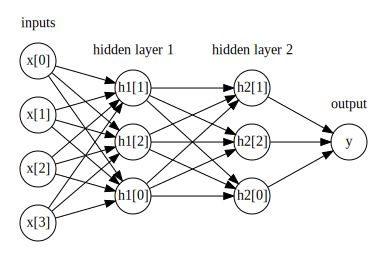

In [0]:
mglearn.plots.plot_two_hidden_layer_graph()

隠れ層のノード数
    - 小さい場合は10
    - 複雑なデータでは10,000とか


## 実例


### two_moonsデータ・セットへの適用

Text(0, 0.5, 'Feature 1')

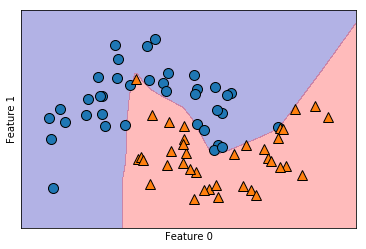

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- ニューラルネットワークが出力する決定曲線は<u>**非線形**</u>になる

- 非活性化関数はデフォルトではreluが使われる
    - 隠れ層が1層の場合にreluを使うと決定曲線は10の線分から構成されることになる

- 決定境界を滑らかにしたい(モデルを複雑にしたい)場合・・・ 
    - 隠れ層を増やす
    - 非線形活性化関数にtanhを使う

### 隠れ層のユニット数をデフォルトの1/10にした例

隠れ層のユニット数はデフォルトでは100になっている


Text(0, 0.5, 'Feature 1')

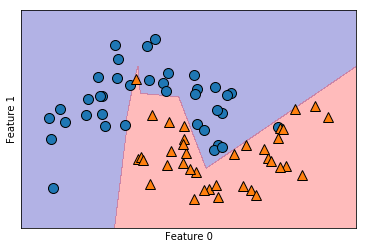

In [0]:
# Hidden Layer : 10Units * 1Layer

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 10ユニットの隠れ層を2層使用する例


Text(0, 0.5, 'Feature 1')

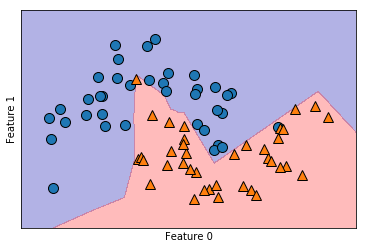

In [0]:
# HIddenLayer : 10Unit * 2Layer

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 活性化関数にtanhを用いた例

Text(0, 0.5, 'Feature 1')

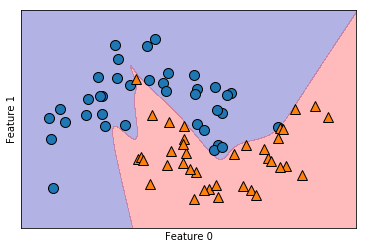

In [0]:
# HIddenLayer : 10Unit * 2Layer
# Activation Function : tanh

mlp = MLPClassifier(solver='lbfgs', activation='tanh', 
                    random_state=0, hidden_layer_sizes=[10, 10] )

mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 隠れユニット数とalphaパラメータによる例

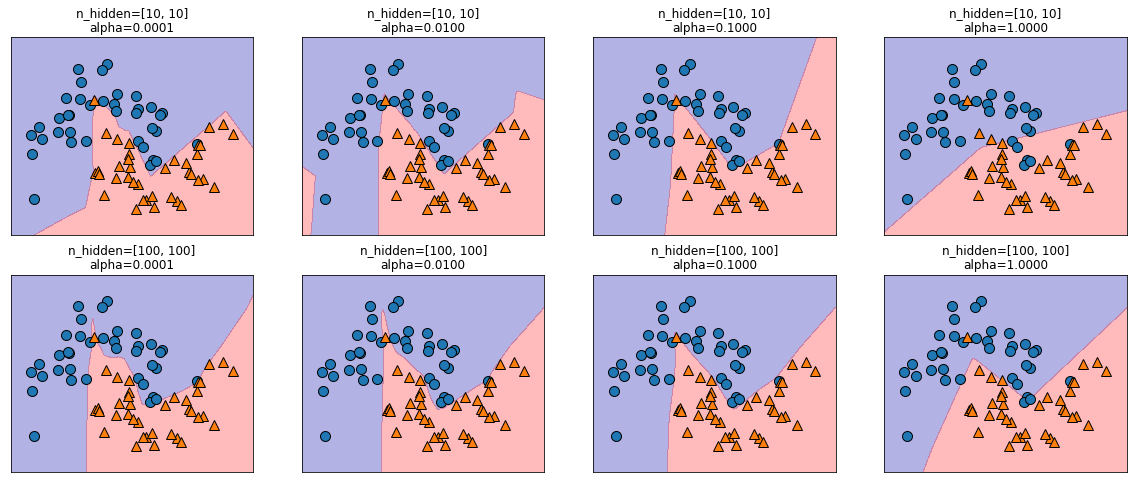

In [0]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha, in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], 
                           alpha=alpha)
        
        mlp.fit(X_train, y_train)
        
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha))
        

### 初期化シードによる影響

- ニューラルネットワークは学習を開始する前に重みを乱数で割り当てる
- <u>乱数による初期化の影響が学習されるモデルに影響を与える</u>
- 同一のパラメータを用いても**異なる乱数シードを用いると異なった結果になる**


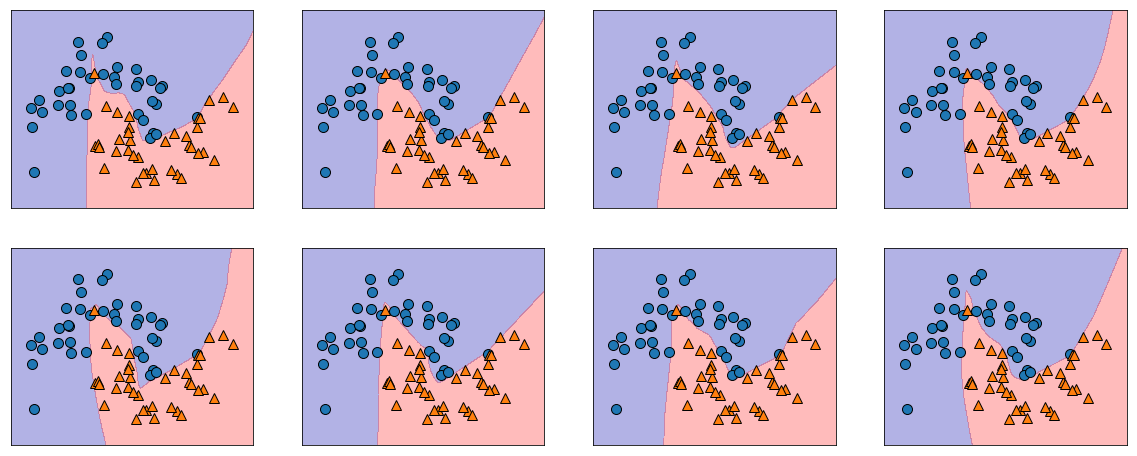

In [0]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

## MLPのcancerデータセットへの適用

In [0]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

# 訓練セットに対する精度を表示
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))

# テストセットに対する精度を表示
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
Accuracy on training set: 0.94
Accuracy on test set: 0.92


- MLPの精度はかなり良いが他のモデルほどではない
    - これはデータスケールの問題によるもの
    
- すべての入力特徴量が同じ範囲に収まっていることを仮定している
    - 理想的には平均が0, 分散が1であることが望ましい

### スケール変換による前処理

In [0]:
# 訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)

# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換する
# これでmean=0、std=1になる
X_train_scaled = (X_train - mean_on_train) / std_on_train

# まったく同じ変換(訓練データの平均と標準偏差を使って)をテストセットに施す
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))

print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- スケール変換を行うと結果が良くなる
    - 収束警告(ConvergenceWarning)が出力されて学習繰り返しの回数が最大値に達している旨の警告が出ている

学習の繰り返し回数を変えてみる    

In [0]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))

print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


- 繰り返し回数を増やすしても訓練セットに対する性能が上がるのみ
    - 汎化性能は上がっていない
    
- 訓練性能とテスト性能の差があるということは...
    - モデルの複雑さを下げれば汎化性能が上がる可能性がある

alphaパラメータを0.0001から1に上げて正則化を強化してみると...
- もっともベストな結果が得られた


In [0]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))

print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


### ニューラルネットワークの学習内容の解析

--- 

- ニューラルネットワークが学習した内容を解析すること自体は可能
- ただし線形モデルや決定木よりも解析が難しい

- 学習されたものを確認する方法の一つとして**モデル内部の重み**を見てみる

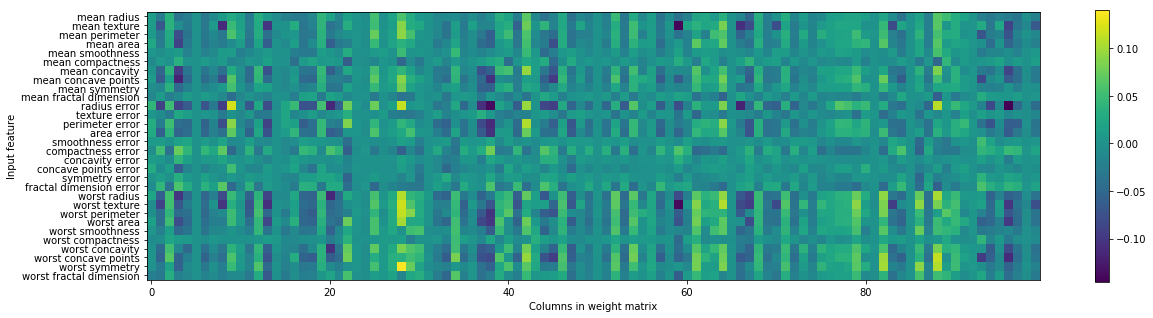

In [0]:
# 入力と第1層を繋いでいる重みが学習されたものを可視化してみる

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

上図の読み方

- 行 : 30種類の入力特徴量
- 列 : 100の隠れユニットに相当
- 色合い : 明るい色が正の値、暗い色が負の値

結果の考察

- すべての隠れユニットに対して重みが小さい特徴量は**このモデルにとって重要ではない**と考えられる
    - mean smoothness
    - mean compactness
    - smoothness error〜fractral dimension
    
    - つまり以下のどちらか
        - 特徴量をニューラルネットが使えるように表現できていなかった
        - 特徴量自体が"本当に"重要ではない
    
- 隠れ層から出力層への出力の重みの可視化

    - 入力層から第1層を繋いでいる重みよりも**更に**わかりにくい


scikit-learn以外のライブラリ    

- MLPClassifierとMLPRegressorは一般的なニューラルネットアーキテクチャを簡単に使えるようになっている
- ただし、ニューラルネットワークで可能なことのごく一部しかカバーしていない
- より柔軟なものや、より大きなモデルを使う場合は<u>scikit-learn以外のライブラリを使うべき</u>
    - keras
    - lasagna
    - tensor-flow
    
- lasagnaはtheanoを用いて構築されている
- kerasはtensor-flowとtheanoのどちらでも使える

- 人気のあるライブラリはGPUを使うことができる
    - GPUが使えると計算速度が10〜100倍高速化できる
    - 大規模なデータセットに対してディープラーニングを用いる場合は**計算速度が重要**

## 長所・短所・パラメータ

### 長所

--- 

- 大量のデータ・セットから複雑なモデルを構築できる
- 十分な計算時間とデータをかければ、他の機械学習アルゴリズムに勝てる

### 短所

---


- 大きくて強力なモデルを構築する場合<u>**訓練に時間がかかる**</u>
- 慎重に前処理を施す必要がある
    - SVMと同様にすべての特徴量が同じ意味を持つ場合に最もよく機能する
    - 様々な種類の特徴量を持つデータは決定木に基づくモデルの方が性能が良い

- パラメータのチューニングにシビア
    - チューニング自体が一つの技術になっているほど

### パラメータ

---


- 隠れ層の数と層毎のユニット数
    - 最も重要なパラメータ

- 隠れ層あたりのノードの数
    - 入力層と同じくらいにすることが多い
    - 数千より大きくなることはあまりない

- 正則化(alpha)パラメータ
- 非線形活性化関数の種別
    - relu
    - tanh

- 重みの数
    - ニューラルネットのモデルの複雑さを考える上での尺度


特徴量が100ある2クラス分類のデータ・セットの重みの数

- 隠れ層に100ユニットが含まれる場合...
    - 入力と隠れ層の間の重みの数は100^2 = 10,000個
    - 隠れ層と出力層の重みの数は100 * 1 = 100
    - *合計で10,100個の重み*

- 100の隠れユニットを持つ第2隠れ層を追加した場合...
    - 第1隠れ層と第2隠れ層の間に 100^2 = 10,000個の重み
    - *総合計で20,100個の重み*

- 1,000ユニットがある第2隠れ層を追加した場合...
    - 入力と隠れ層の間の重み: 1000 * 1000 = 1,000,000個
    - **重みの総合計 : 1,101,000個**

    - 100ユニット2層の場合よりも**50倍大きい！**

#### 一般的なパラメータの調整手順

--- 

1.   過剰適合するような大きいネットワークを作る
2.   訓練データを投入し学習できることを確認する
3.   汎化性能を向上させる
    - ネットワークを小さくする
    - alphaを増やして正則化を強化する


#### パラメータ学習時のアルゴリズム

--- 

- adam
    - ほとんどのケースでよく機能する
    - 学習データセットのスケールに敏感
    - データ・セットは平均0, 分散1にしておくことが重要

- lbfgs
    - モデルが大きい場合や大規模なデータ・セットには時間がかかる
    - 頑健

- sgd
    - lgfgsのより高度なもの
    - ディープラーニングでよく使われる
    - 多くのパラメータがあり、最良の結果を得るには調整が必要  
        
        
- <u>MLPの初心者は'adam'と'lbfgs'を使っておけば良いらしい</u>